# Week3 - Homework

Write a rule based predictor for the dataset below.

Choose one of the following datasets and do your EDA.
Test your assumptions.

Finally write your code in `predict_one` function.

Do __NOT__ change the function signature! This function should only take name and return `F` or `M`

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

us_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/us_names.csv'
# in_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/in_names.csv'

df = pd.read_csv(us_names)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27999 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    27999 non-null  object
 1   gender  27999 non-null  object
dtypes: object(2)
memory usage: 656.2+ KB


In [2]:
df.gender.value_counts()

gender
M    14000
F    13999
Name: count, dtype: int64

### Two examples:

In [3]:
df['is_last_letter_vowel'] = [ 'aeiou'.find(name[-1])>0 for name in df.name]

<Axes: xlabel='is_last_letter_vowel', ylabel='count'>

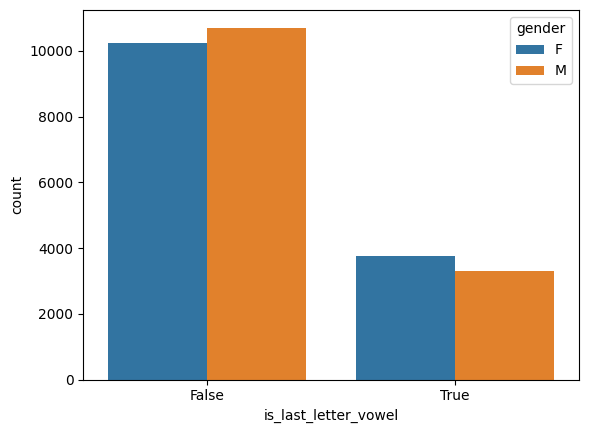

In [4]:
import seaborn as sns

sns.countplot(data = df, x = 'is_last_letter_vowel', hue = 'gender')

It looks like last letter is being a vowel is not a good indicator for this dataset!

<Axes: xlabel='len', ylabel='count'>

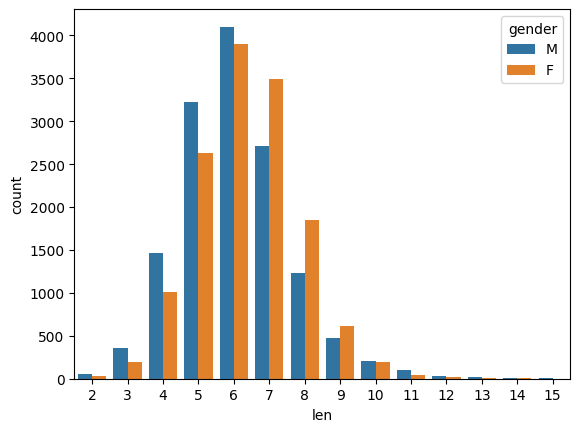

In [5]:
df['len'] = [ len(name) for name in df.name]
sns.countplot(data = df, x = 'len', hue = 'gender')

Seems like length doesn't also seem like a good separator

My own EDA

In [10]:
df.head(5)

,name,gender,is_last_letter_vowel,len
0,jerilynn,F,False,8
1,percy,M,False,5
2,landry,M,False,6
3,reynalda,F,False,8
4,girl,F,False,4


In [12]:
df.groupby(['name']).name.count()

name
aaban       1
aadam       1
aadan       1
aadarsh     1
aaden       1
           ..
zyria       1
zyriah      1
zyron       1
zyrus       1
zyshonne    1
Name: name, Length: 25948, dtype: int64

In [14]:
df['first_letter'] = [name[0] for name in df.name]
df.head(5)

,name,gender,is_last_letter_vowel,len,first_letter
0,jerilynn,F,False,8,j
1,percy,M,False,5,p
2,landry,M,False,6,l
3,reynalda,F,False,8,r
4,girl,F,False,4,g


In [15]:
female_first_letters = set(df[df['gender'] == 'F']['first_letter'])
male_first_letters = set(df[df['gender'] == 'M']['first_letter'])

print(f'Female first letters: {female_first_letters}')
print(f'Male first letters: {male_first_letters}')

Female first letters: {'s', 'g', 'x', 'w', 'e', 'l', 'n', 'y', 'v', 'm', 'p', 'j', 't', 'd', 'u', 'b', 'i', 'h', 'a', 'f', 'z', 'k', 'o', 'q', 'r', 'c'}
Male first letters: {'s', 'g', 'x', 'w', 'e', 'l', 'n', 'y', 'v', 'm', 'p', 't', 'j', 'd', 'u', 'b', 'i', 'h', 'a', 'f', 'z', 'k', 'o', 'q', 'r', 'c'}


It seems the sets are equal, so can't really discern off first letter

What if the last letter is the letter is y

In [21]:
df['is_last_letter_y'] = [ 'y'.find(name[-1]) == 0 for name in df.name]
df.head(5)

,name,gender,is_last_letter_vowel,len,first_letter,is_last_letter_y
0,jerilynn,F,False,8,j,False
1,percy,M,False,5,p,True
2,landry,M,False,6,l,True
3,reynalda,F,False,8,r,False
4,girl,F,False,4,g,False


<Axes: xlabel='is_last_letter_y', ylabel='count'>

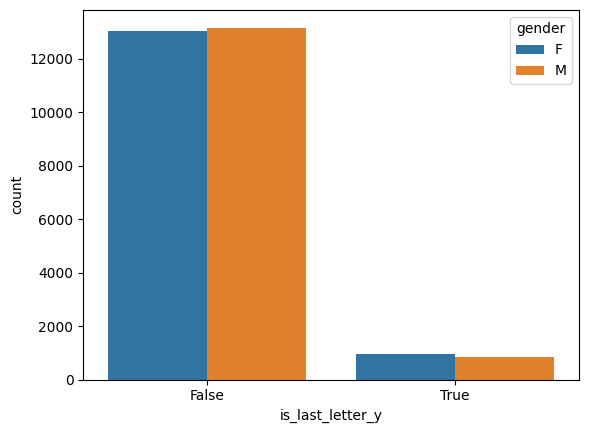

In [22]:
sns.countplot(data = df, x = 'is_last_letter_y', hue = 'gender')

Would the length being between two values have meaning? Specifically, being between 7 and 9 for females?

In [7]:
df['is_len_btwn_7_and_9'] = [ ((value >= 7) & (value <=9)) for value in df.len]
df.head(5)

,name,gender,is_last_letter_vowel,len,is_len_btwn_7_and_9
0,jerilynn,F,False,8,True
1,percy,M,False,5,False
2,landry,M,False,6,False
3,reynalda,F,False,8,True
4,girl,F,False,4,False


<Axes: xlabel='is_len_btwn_7_and_9', ylabel='count'>

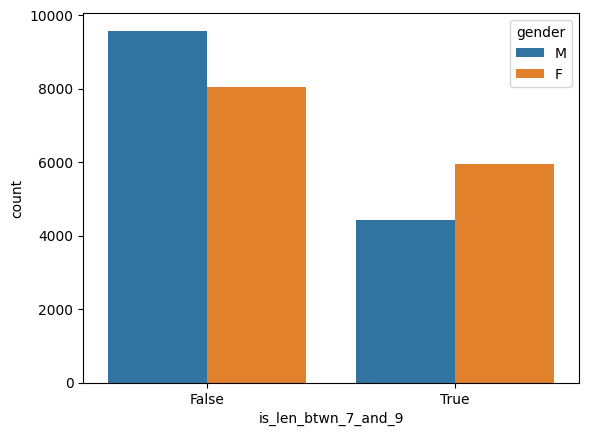

In [9]:
sns.countplot(data=df, x = 'is_len_btwn_7_and_9', hue = 'gender')

There is definitely some separation here. But not enough.

What about looking solely at the last letters? This article suggests that most female names end in a, e, or i. Reference: https://pubmed.ncbi.nlm.nih.gov/11026389/#:~:text=The%20last%20spelled%20letter%20often,number%20of%20predominantly%20female%20endings.

In [13]:
df['last_letter'] = [name[-1] for name in df.name]
df.head(5)

,name,gender,is_last_letter_vowel,len,is_len_btwn_7_and_9,last_letter
0,jerilynn,F,False,8,True,n
1,percy,M,False,5,False,y
2,landry,M,False,6,False,y
3,reynalda,F,False,8,True,a
4,girl,F,False,4,False,l


<Axes: xlabel='last_letter', ylabel='count'>

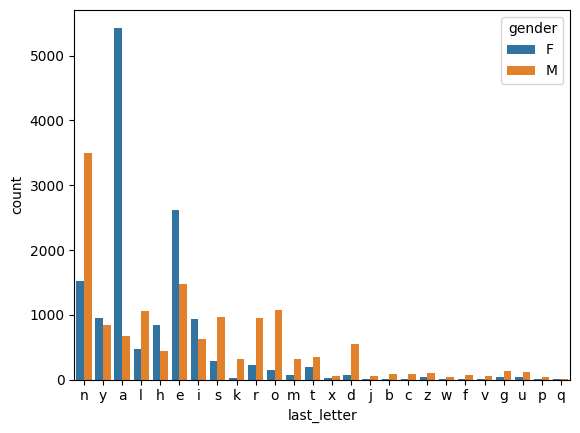

In [14]:
sns.countplot(data=df, x='last_letter', hue = 'gender')

There is definitely a strong indicator in the letter 'a'. Moderate indication in letter 'e'. There is weak indication in 'i', 'h', and 'y'. On the male side, there are strong indicators in 'n', 'l', 's', 'k', 'r', 'o', and 'd'.

In [17]:
def predict_one(name): # DON'T CHANGE THIS LINE
    # your code
    if name[-1] in ['a', 'e', 'i', 'h', 'y']:
        return 'F'
    else:
        return 'M'

# Examples
print(predict_one('Jane'))
print(predict_one('Michael'))

F
M


In [18]:
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.74020500732169
